# Fake currency detection using ResNet50 model

In [2]:
#import all necessary modules
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array 
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.models import Sequential,Model,load_model
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#define height and width of the image
height=300
width=300

#create a ResNet50 model instance without the top layer as we will add our own top layer
base_model=ResNet50(weights='imagenet',include_top=False,input_shape=(height,width,3))

In [4]:
#define directory containing training and validation data
train_dir="dataset/training"
validation_dir="dataset/validation"

#number of batches the data has to be divided into
batch_size=8

#create datagen and generator to load the data from training directory
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=90,horizontal_flip=True,vertical_flip=True)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(height,width),batch_size=batch_size)

#create datagen and generator to load the data from validation directory
validation_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=90,horizontal_flip=True,vertical_flip=True)
validation_generator=validation_datagen.flow_from_directory(validation_dir,target_size=(height,width),batch_size=batch_size)

Found 2774 images belonging to 2 classes.
Found 592 images belonging to 2 classes.


In [5]:
def build_finetune_model(base_model,dropout,fc_layers,num_classes):
    for layer in base_model.layers:
        layer.trainable=False

    x=base_model.output
    x=Flatten()(x)
    for fc in fc_layers:
        x=Dense(fc,activation='relu')(x)
        x=Dropout(dropout)(x)
    
    predictions=Dense(num_classes,activation='softmax')(x)

    finetune_model=Model(inputs=base_model.input,outputs=predictions) 
    
    return finetune_model

class_list=['Real','Fake'] #the labels of our data
FC_Layers=[1024,1024]
dropout=0.5

finetune_model=build_finetune_model(base_model,dropout=dropout,fc_layers=FC_Layers,num_classes=len(class_list))

In [6]:
num_epochs=20
num_train_images=2774

In [7]:

#checkpoint in case anything goes wrong
checkpoint=ModelCheckpoint("Final_model.h5",monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
early=EarlyStopping(monitor='val_accuracy',min_delta=0,patience=40,verbose=1,mode="auto")

#compile the model before using
optimizer = optimizers.SGD(learning_rate=0.001, momentum=0.9)
finetune_model.compile(loss="categorical_crossentropy",optimizer=optimizer, metrics=['accuracy'])

#train the model
finetune_model.fit(train_generator,steps_per_epoch=num_train_images//batch_size,epochs=num_epochs,validation_data=validation_generator,validation_steps=1,callbacks=[checkpoint,early])

#save the model
#finetune_model.save_weights("Final_model.h5")

c:\Users\PRATYAOY SARKAR\FinalYrProject\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5190 - loss: 254.3161

c:\Users\PRATYAOY SARKAR\FinalYrProject\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from None to 0.50000, saving model to Final_model.h5


346/346 ━━━━━━━━━━━━━━━━━━━━ 796s 2s/step - accuracy: 0.5130 - loss: 187.7101 - val_accuracy: 0.5000 - val_loss: 0.6410
Epoch 2/20
  1/346 ━━━━━━━━━━━━━━━━━━━━ 18:58 3s/step - accuracy: 0.5000 - loss: 0.7118

c:\Users\PRATYAOY SARKAR\FinalYrProject\myenv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy did not improve from 0.50000
346/346 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5000 - loss: 0.7118 - val_accuracy: 0.2500 - val_loss: 0.7214
Epoch 3/20
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5102 - loss: 3.3736
Epoch 3: val_accuracy did not improve from 0.50000
346/346 ━━━━━━━━━━━━━━━━━━━━ 726s 2s/step - accuracy: 0.5116 - loss: 2.3754 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/20
  1/346 ━━━━━━━━━━━━━━━━━━━━ 14:05 2s/step - accuracy: 0.7500 - loss: 0.5824
Epoch 4: val_accuracy did not improve from 0.50000
346/346 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7500 - loss: 0.5824 - val_accuracy: 0.3750 - val_loss: 0.6934
Epoch 5/20
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4866 - loss: 1.5904
Epoch 5: val_accuracy improved from 0.50000 to 0.87500, saving model to Final_model.h5


346/346 ━━━━━━━━━━━━━━━━━━━━ 763s 2s/step - accuracy: 0.4910 - loss: 1.5138 - val_accuracy: 0.8750 - val_loss: 0.6860
Epoch 6/20
  1/346 ━━━━━━━━━━━━━━━━━━━━ 18:36 3s/step - accuracy: 0.2500 - loss: 0.7086
Epoch 6: val_accuracy did not improve from 0.87500
346/346 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2500 - loss: 0.7086 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/20
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4556 - loss: 1.2909
Epoch 7: val_accuracy did not improve from 0.87500
346/346 ━━━━━━━━━━━━━━━━━━━━ 737s 2s/step - accuracy: 0.4664 - loss: 1.9046 - val_accuracy: 0.3750 - val_loss: 0.6937
Epoch 8/20
  1/346 ━━━━━━━━━━━━━━━━━━━━ 13:11 2s/step - accuracy: 0.5000 - loss: 0.6910
Epoch 8: val_accuracy did not improve from 0.87500
346/346 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5000 - loss: 0.6910 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 9/20
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4883 - loss: 1.2678
Epoch 9: val_accuracy did not i

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Real


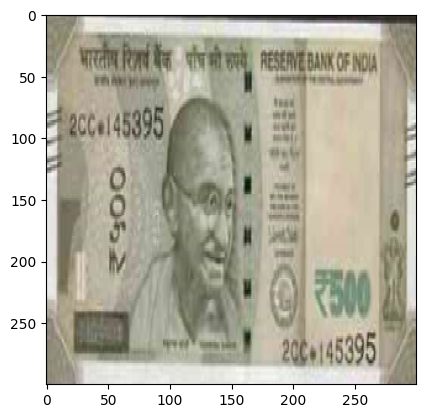

In [12]:
#testing the model
img=load_img('dataset/testing/real/Screenshot 2025-02-11 143947.png',target_size=(300,300)) #The path of the testing image,the pic taken from the phone should come here
img=np.asarray(img)
plt.imshow(img)
img=np.expand_dims(img,axis=0)
finetune_model.load_weights("Final_model.h5")

output=finetune_model.predict(img) #predicting the image using model created
if(output[0][0]>output[0][1]): #comparison
    print("Fake")
else:
    print("Real")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
Real


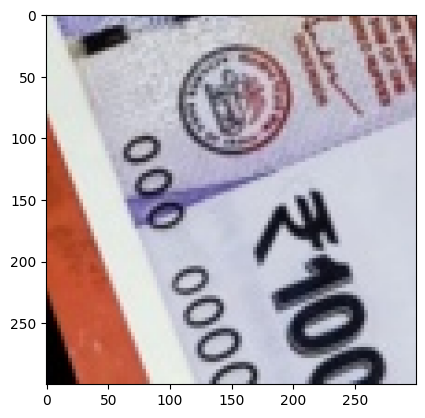

In [14]:
#testing the model
img=load_img("dataset/testing/fake/aug_1388_WhatsApp Image 2025-04-05 at 10.59.15.jpeg",target_size=(300,300)) #The path of the testing image,the pic taken from the phone should come here
img=np.asarray(img)
plt.imshow(img)
img=np.expand_dims(img,axis=0)
finetune_model.load_weights("Final_model.h5")

output=finetune_model.predict(img) #predicting the image using model created
if(output[0][0]>output[0][1]): #comparison
    print("Fake")
else:
    print("Real")